<a href="https://colab.research.google.com/github/Deepikadhinakaran/AI_price_optima/blob/main/price_optima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
df=pd.read_csv('dynamic_pricing.csv')

In [105]:
print("shape:",df.shape)

shape: (1000, 10)


In [106]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [107]:
mc=df.isnull().sum()
dc=df.duplicated().sum()
print("missing value: ",mc)
print("duplicate value: ",dc)

missing value:  Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64
duplicate value:  0


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [109]:
print(df.columns)
df.describe()

Index(['Number_of_Riders', 'Number_of_Drivers', 'Location_Category',
       'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings',
       'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration',
       'Historical_Cost_of_Ride'],
      dtype='object')


,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [110]:
num_cols=df.select_dtypes(include=np.number).columns.tolist()
cat_cols=df.select_dtypes(exclude=np.number).columns.tolist()
print("Numerical Columns:")
for num in num_cols:
    print(num)
print("\nCategorical Columns:")
for cat in cat_cols:
    print(cat)

Numerical Columns:
Number_of_Riders
Number_of_Drivers
Number_of_Past_Rides
Average_Ratings
Expected_Ride_Duration
Historical_Cost_of_Ride

Categorical Columns:
Location_Category
Customer_Loyalty_Status
Time_of_Booking
Vehicle_Type


In [111]:
# IQR Method
num_cols = df.select_dtypes(include=["int64","float64"]).columns

outlier_summary = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    outlier_summary[col] = len(outliers)

outlier_summary



{'Number_of_Riders': 0,
 'Number_of_Drivers': 10,
 'Number_of_Past_Rides': 0,
 'Average_Ratings': 0,
 'Expected_Ride_Duration': 0,
 'Historical_Cost_of_Ride': 0}

In [112]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))
    print(f"Outliers in {col}: {len(df[(df[col] < lower) | (df[col] > upper)])}")


Outliers in Number_of_Riders: 0
Outliers in Number_of_Drivers: 0
Outliers in Number_of_Past_Rides: 0
Outliers in Average_Ratings: 0
Outliers in Expected_Ride_Duration: 0
Outliers in Historical_Cost_of_Ride: 0


In [113]:


df["Price"] = df["Historical_Cost_of_Ride"]
df["Completed_Rides"] = df[["Number_of_Riders", "Number_of_Drivers"]].min(axis=1)
df["Booking_Intents"] = df["Number_of_Riders"]
df["Cancelled_Rides"] = df["Booking_Intents"] - df["Completed_Rides"]
df["Cost"] = df["Price"] * 0.7   # assume 70% of fare is operating cost




df["Revenue"] = df["Price"] * df["Completed_Rides"]
df["Profit"] = (df["Price"] - df["Cost"]) * df["Completed_Rides"]


baseline_price = df["Price"].mean()
df["Baseline_Revenue"] = baseline_price * df["Completed_Rides"]
df["Revenue_Lift_%"] = ((df["Revenue"] - df["Baseline_Revenue"]) / df["Baseline_Revenue"]) * 100


df["Gross_Margin_%"] = ((df["Revenue"] - (df["Cost"] * df["Completed_Rides"])) / df["Revenue"]) * 100


df["Conversion_Rate_%"] = (df["Completed_Rides"] / df["Booking_Intents"]) * 100
df["Cancellation_Rate_%"] = (df["Cancelled_Rides"] / df["Booking_Intents"]) * 100


df["Price_Shift"] = df["Price"].shift(1)
df["Price_Change_%"] = ((df["Price"] - df["Price_Shift"]) / df["Price_Shift"]) * 100
df["Price_Change_Flag"] = np.where(df["Price_Change_%"].abs() > 15, 1, 0)


kpi_summary = {
    "Revenue (₹)": df["Revenue"].sum(),
    "Profit (₹)": df["Profit"].sum(),
    "Revenue Lift (%)": df["Revenue_Lift_%"].mean(),
    "Gross Margin (%)": df["Gross_Margin_%"].mean(),
    "Conversion Rate (%)": df["Conversion_Rate_%"].mean(),
    "Price Change Rate (%)": df["Price_Change_Flag"].mean() * 100,
    "Cancellation Rate (%)": df["Cancellation_Rate_%"].mean()
}

kpi_table = pd.DataFrame([kpi_summary])


print("KPI Summary Table:")
print(kpi_table.to_string(index=False))



KPI Summary Table:
 Revenue (₹)   Profit (₹)  Revenue Lift (%)  Gross Margin (%)  Conversion Rate (%)  Price Change Rate (%)  Cancellation Rate (%)
1.013314e+07 3.039942e+06     -4.206413e-15              30.0            43.763674                   86.6              56.236326


In [128]:
# -----------------------
# Core engineered features (safe, numeric only)
# -----------------------

# Ensure no NaN in base dataset
df = df.copy()
df = df.fillna(0)   # fill any leftover blanks with 0 to start clean

# 1. Ride Duration (simulate if not present)
if "Ride_Duration" not in df.columns:
    np.random.seed(42)
    df["Ride_Duration"] = np.random.randint(5, 120, size=len(df))  # minutes
df["Ride_Duration"] = pd.to_numeric(df["Ride_Duration"], errors="coerce").fillna(0)

# 2. Competitor Price (simulate if missing)
if "competitor_price" not in df.columns and "Price" in df.columns:
    df["competitor_price"] = df["Price"] * (1 + np.random.uniform(-0.1, 0.1, len(df)))
df["competitor_price"] = pd.to_numeric(df["competitor_price"], errors="coerce").fillna(0)

# 3. Cost per Min
if "Cost" in df.columns and "Ride_Duration" in df.columns:
    df["Cost_per_Min"] = df["Cost"] / (df["Ride_Duration"] + 1e-6)
    df["Cost_per_Min"] = df["Cost_per_Min"].replace([np.inf, -np.inf], 0).fillna(0)

# 4. Driver to Rider Ratio
if "Number_of_Drivers" in df.columns and "Number_of_Riders" in df.columns:
    df["Driver_to_Rider_Ratio"] = df["Number_of_Drivers"] / (df["Number_of_Riders"] + 1e-6)
    df["Driver_to_Rider_Ratio"] = df["Driver_to_Rider_Ratio"].replace([np.inf, -np.inf], 0).fillna(0)

# 5. Inventory Health Index
if "Number_of_Drivers" in df.columns:
    avg_drivers = df["Number_of_Drivers"].mean() + 1e-6
    df["Inventory_Health_Index"] = df["Number_of_Drivers"] / avg_drivers
    df["Inventory_Health_Index"] = df["Inventory_Health_Index"].fillna(0)

# 6. Loyalty Score
if "Loyalty_Status" not in df.columns:
    np.random.seed(42)
    df["Loyalty_Status"] = np.random.choice(["Regular", "Silver", "Gold"], size=len(df), p=[0.6, 0.3, 0.1])
loyalty_map = {"Regular": 0, "Silver": 1, "Gold": 2}
df["Loyalty_Score"] = df["Loyalty_Status"].map(loyalty_map).fillna(0).astype(int)

# 7. Peak Hour flag
if "Time_of_Booking" in df.columns:
    df["Time_of_Booking"] = pd.to_datetime(df["Time_of_Booking"], errors="coerce")
    df["Hour"] = df["Time_of_Booking"].dt.hour.fillna(0).astype(int)
    df["Peak"] = df["Hour"].apply(lambda x: 1 if (7 <= x <= 10) or (17 <= x <= 21) else 0)
else:
    df["Hour"], df["Peak"] = 0, 0

# 8. Rider to Driver Ratio
if "Number_of_Riders" in df.columns and "Number_of_Drivers" in df.columns:
    df["Rider_Driver_Ratio"] = df["Number_of_Riders"] / (df["Number_of_Drivers"] + 1e-6)
    df["Rider_Driver_Ratio"] = df["Rider_Driver_Ratio"].replace([np.inf, -np.inf], 0).fillna(0)

# 9. Supply Tightness (binary condition)
if "Number_of_Riders" in df.columns and "Number_of_Drivers" in df.columns:
    df["Supply_Tightness"] = np.where(df["Number_of_Riders"] > df["Number_of_Drivers"], 1, 0)
else:
    df["Supply_Tightness"] = 0

# 10. Vehicle Factor
if "Vehicle_Type" in df.columns:
    vehicle_map = {"Sedan": 1.0, "SUV": 1.2, "Mini": 0.9, "Auto": 0.8, "Bike": 0.6}
    df["Vehicle_Factor"] = df["Vehicle_Type"].map(vehicle_map).fillna(1.0)
else:
    df["Vehicle_Factor"] = 1.0

# 11. Baseline Price (daily mean instead of constant)
if "Price" in df.columns and "Time_of_Booking" in df.columns:
    df["Booking_Date"] = pd.to_datetime(df["Time_of_Booking"], errors="coerce").dt.date
    df["baseline_price"] = df.groupby("Booking_Date")["Price"].transform("mean").fillna(df["Price"].mean())
else:
    df["baseline_price"] = df.get("Price", pd.Series([0]*len(df)))

# 12. Probability of completion
if "Completed_Rides" in df.columns and "Time_of_Booking" in df.columns:
    df["Booking_Date"] = pd.to_datetime(df["Time_of_Booking"], errors="coerce").dt.date
    df["Hour"] = pd.to_datetime(df["Time_of_Booking"], errors="coerce").dt.hour.fillna(0).astype(int)
    df["Total_Bookings"] = df.groupby(["Booking_Date", "Hour"])["Booking_Date"].transform("count").fillna(0)

    df["p_complete"] = df["Completed_Rides"] / (df["Total_Bookings"] + 1e-6)
    df["p_complete"] = df["p_complete"].replace([np.inf, -np.inf], 0).fillna(0)
else:
    df["p_complete"] = 0

# 13. Price Difference
if "Price" in df.columns and "competitor_price" in df.columns:
    df["Price_Diff"] = df["Price"] - df["competitor_price"]
    df["Price_Diff"] = df["Price_Diff"].fillna(0)
else:
    df["Price_Diff"] = 0

# -----------------------
# Final clean-up
# -----------------------
df = df.fillna(0)  # ensure no NaN
df = df.replace([np.inf, -np.inf], 0)

# Save
df.to_csv("dynamic_pricing_with_features_clean.csv", index=False)
print("✅ Engineered features added, all numeric, file saved!")
print(df.dtypes)  # confirm all numerical



✅ Engineered features added, all numeric, file saved!
Number_of_Riders                  float64
Number_of_Drivers                 float64
Location_Category                  object
Customer_Loyalty_Status            object
Number_of_Past_Rides              float64
Average_Ratings                   float64
Time_of_Booking            datetime64[ns]
Vehicle_Type                       object
Expected_Ride_Duration            float64
Historical_Cost_of_Ride           float64
Price                             float64
Completed_Rides                   float64
Booking_Intents                   float64
Cancelled_Rides                   float64
Cost                              float64
Revenue                           float64
Profit                            float64
Baseline_Revenue                  float64
Revenue_Lift_%                    float64
Gross_Margin_%                    float64
Conversion_Rate_%                 float64
Cancellation_Rate_%               float64
Price_Shift           

/tmp/ipython-input-3263619668.py:7: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)   # fill any leftover blanks with 0 to start clean


In [129]:
df.shape
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,...,Hour,Peak,Rider_Driver_Ratio,Supply_Tightness,Vehicle_Factor,baseline_price,Booking_Date,Total_Bookings,p_complete,Price_Diff
0,90.0,45.0,Urban,Silver,13.0,4.47,1970-01-01,Premium,90.0,284.257273,...,0,0,2.000000,1,1.0,372.502623,1970-01-01,1000,0.045,6.126083
1,58.0,39.0,Suburban,Silver,72.0,4.06,1970-01-01,Economy,43.0,173.874753,...,0,0,1.487179,1,1.0,372.502623,1970-01-01,1000,0.039,2.174306
2,42.0,31.0,Rural,Silver,0.0,3.99,1970-01-01,Premium,76.0,329.795469,...,0,0,1.354839,1,1.0,372.502623,1970-01-01,1000,0.031,-26.657941
3,89.0,28.0,Rural,Regular,67.0,4.31,1970-01-01,Premium,134.0,470.201232,...,0,0,3.178571,1,1.0,372.502623,1970-01-01,1000,0.028,14.270093
4,78.0,22.0,Rural,Regular,74.0,3.77,1970-01-01,Economy,149.0,579.681422,...,0,0,3.545454,1,1.0,372.502623,1970-01-01,1000,0.022,-1.621889


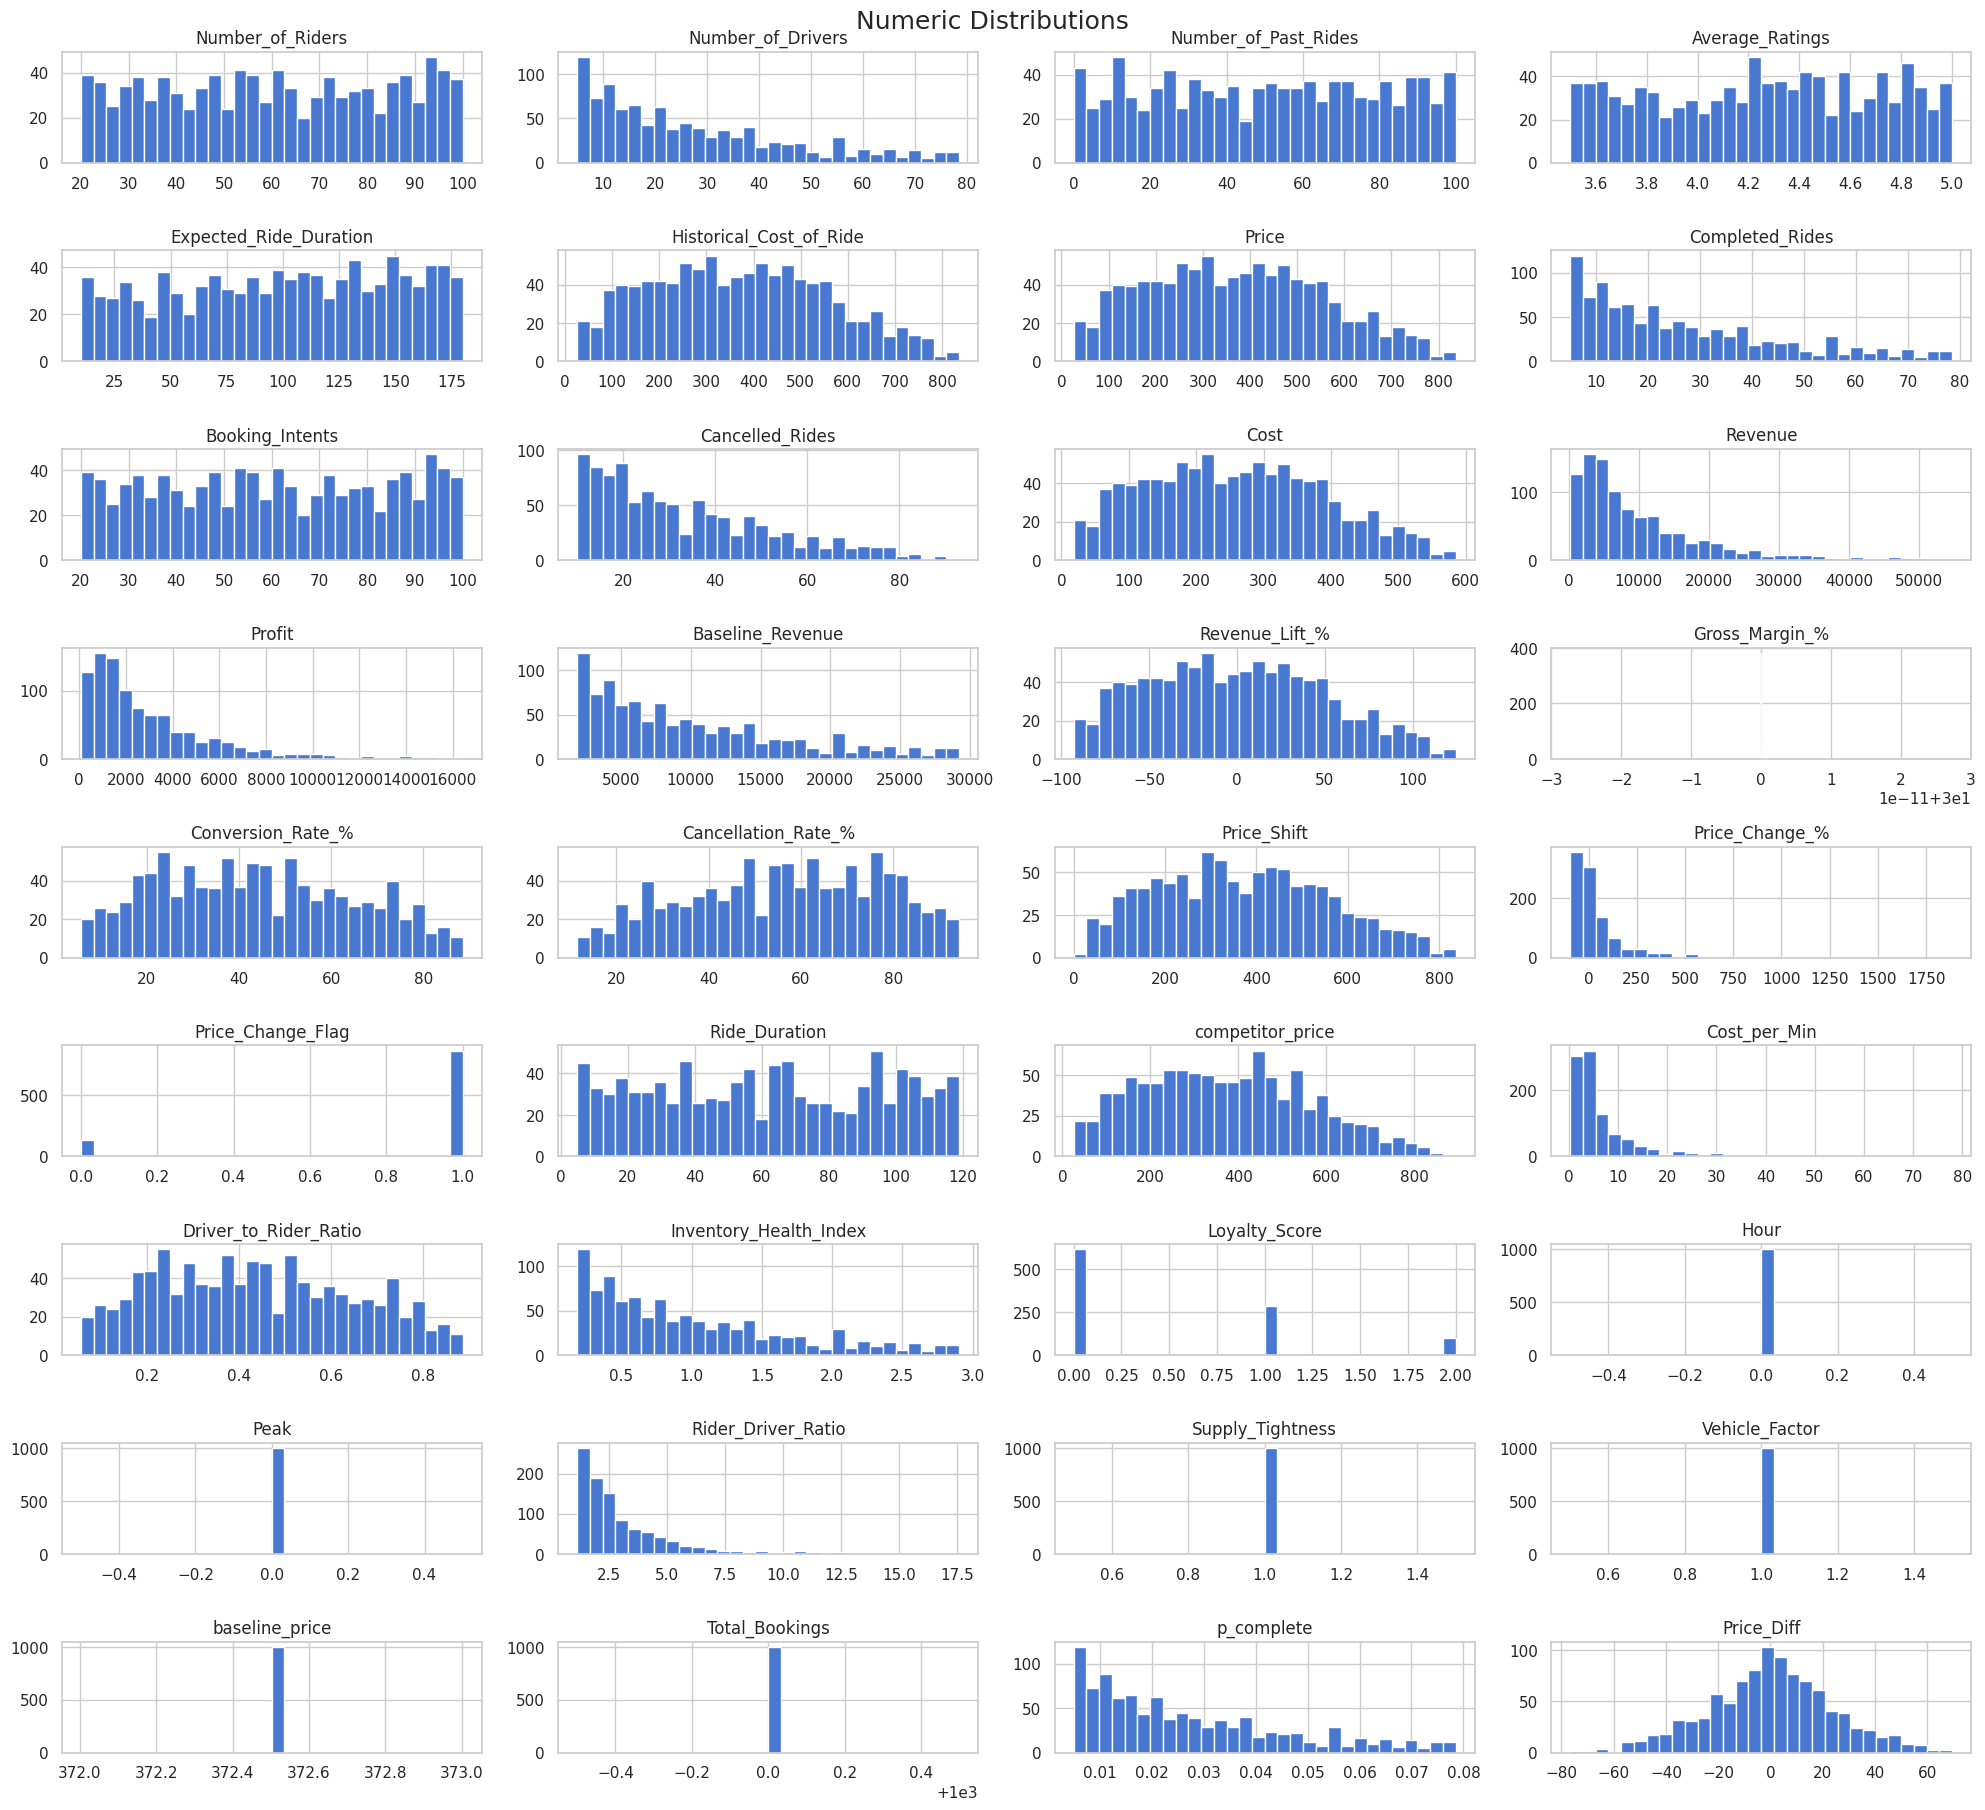

In [136]:


numeric_cols = df.select_dtypes(include="number").columns

# Histograms - one per variable
df[numeric_cols].hist(bins=30, figsize=(20, 20), layout=(len(numeric_cols)//4 + 1, 4))
plt.suptitle("Numeric Distributions", fontsize=18)
plt.tight_layout()
plt.show()




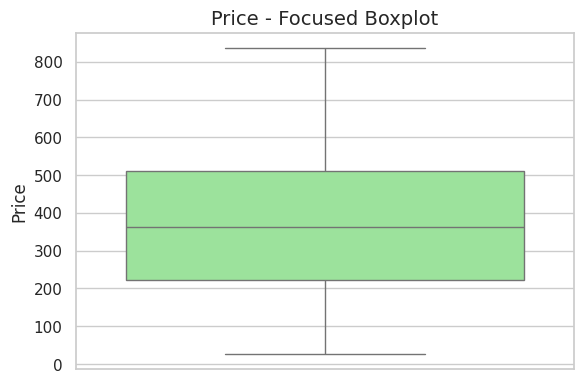

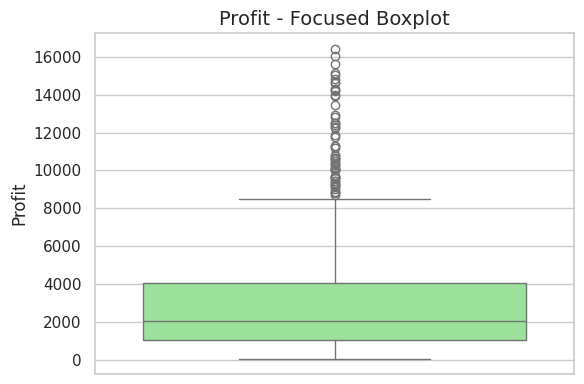

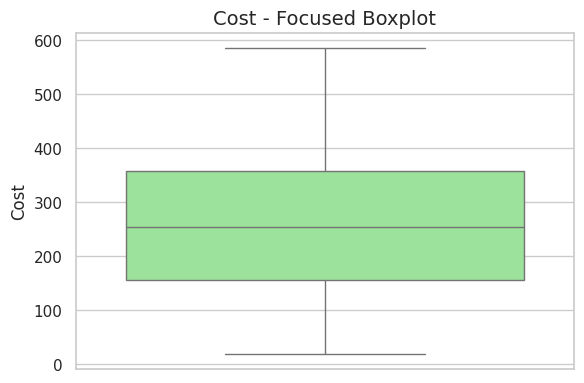

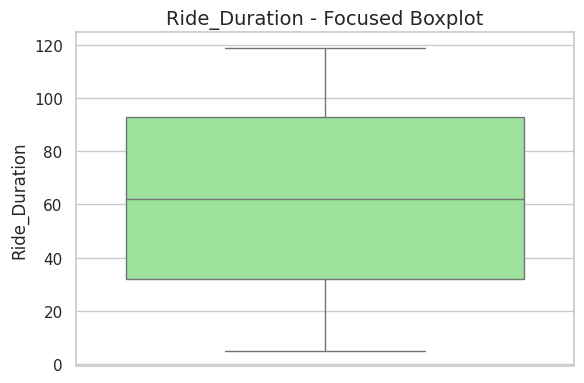

In [140]:
focus_cols = [col for col in ["Price", "Profit", "Cost", "Ride_Duration"] if col in df.columns]

for col in focus_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color="lightgreen")
    plt.title(f"{col} - Focused Boxplot", fontsize=14)
    plt.tight_layout()
    plt.show()




/tmp/ipython-input-3970824038.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=order, palette="viridis")


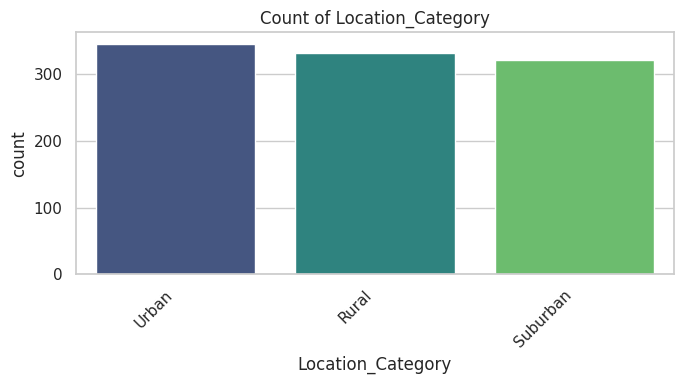

/tmp/ipython-input-3970824038.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=order, palette="viridis")


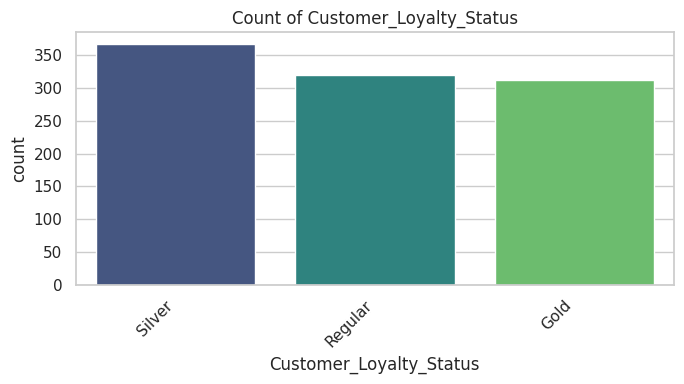

/tmp/ipython-input-3970824038.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=order, palette="viridis")


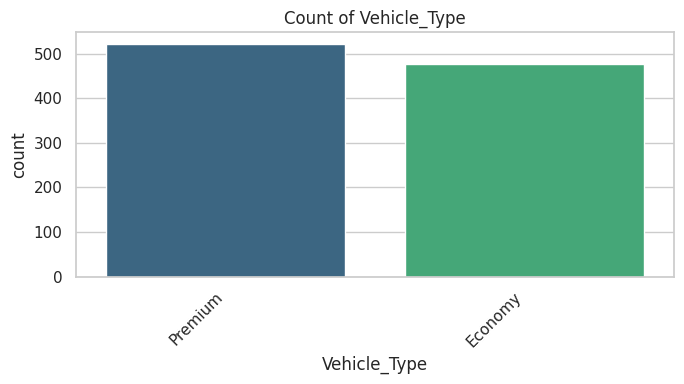

/tmp/ipython-input-3970824038.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=order, palette="viridis")


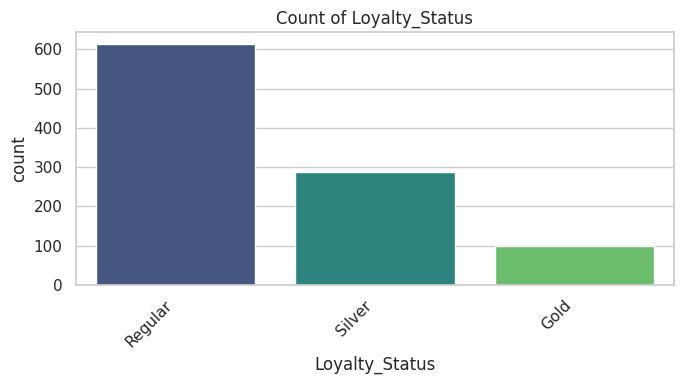

/tmp/ipython-input-3970824038.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=order, palette="viridis")


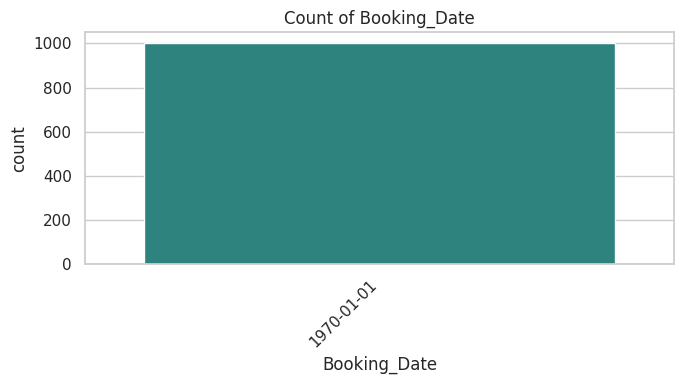

In [141]:
# ============================
# Cell 3 - Categorical Counts
# ============================
cat_cols = df.select_dtypes(include=["object", "category"]).columns

for col in cat_cols:
    plt.figure(figsize=(7, 4))
    order = df[col].value_counts().index  # sort categories by count
    sns.countplot(x=col, data=df, order=order, palette="viridis")
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


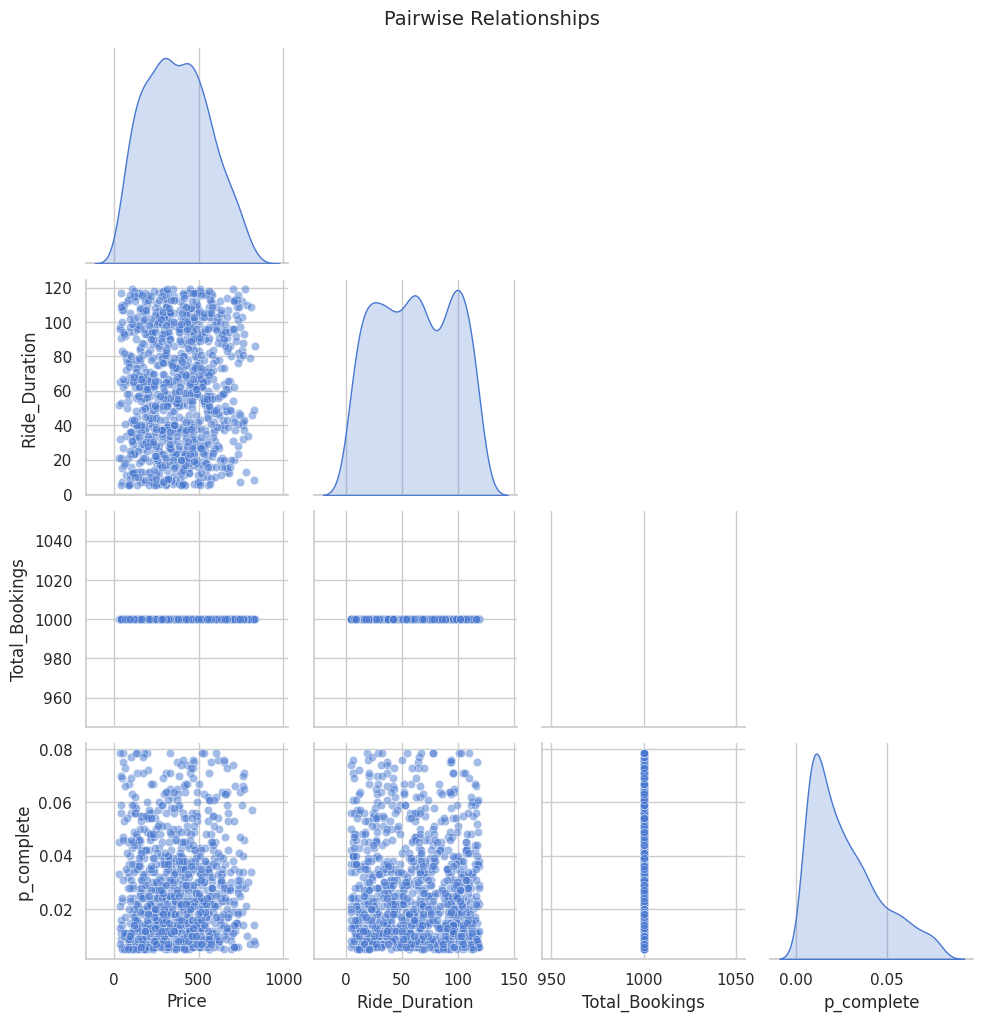

In [142]:
# ============================
# Cell 4 - Relationships
# ============================

num_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Pairplot only for a few main numeric columns (to avoid clumsy plots)
selected = [col for col in ["Price", "Ride_Duration", "Total_Bookings", "p_complete"] if col in num_cols]

if len(selected) >= 2:
    sns.pairplot(df[selected], diag_kind="kde", corner=True, plot_kws={"alpha": 0.5})
    plt.suptitle("Pairwise Relationships", y=1.02, fontsize=14)
    plt.show()
else:
    print("⚠️ Not enough numeric columns for pairplot.")


/tmp/ipython-input-265980065.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


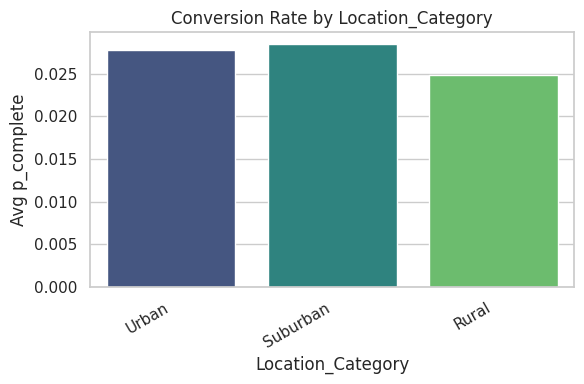

/tmp/ipython-input-265980065.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


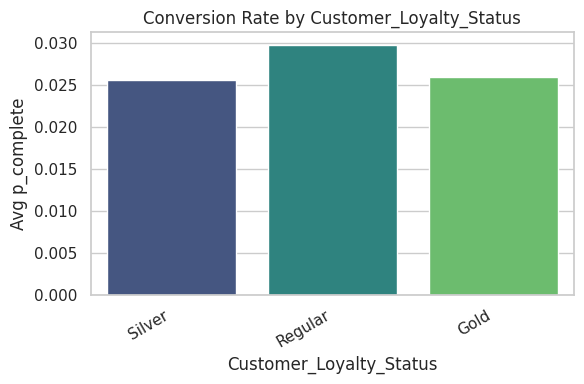

/tmp/ipython-input-265980065.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


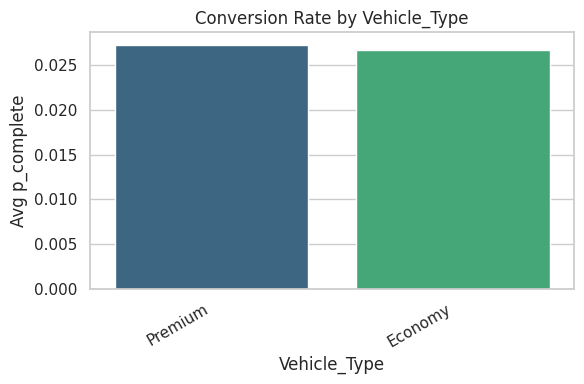

/tmp/ipython-input-265980065.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


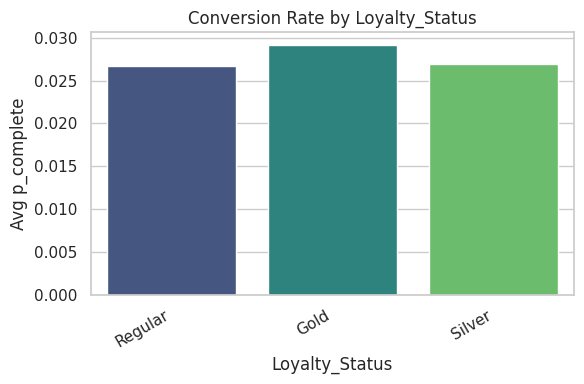

/tmp/ipython-input-265980065.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


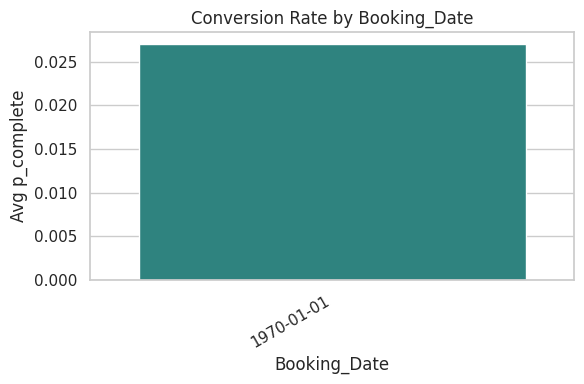

In [143]:
# ============================
# Cell 5 - Conversion by Segments
# ============================

cat_cols = df.select_dtypes(include=["object", "category"]).columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.barplot(
        x=col,
        y="p_complete",
        data=df,
        estimator="mean",
        errorbar=None,
        palette="viridis"
    )
    plt.title(f"Conversion Rate by {col}")
    plt.ylabel("Avg p_complete")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()


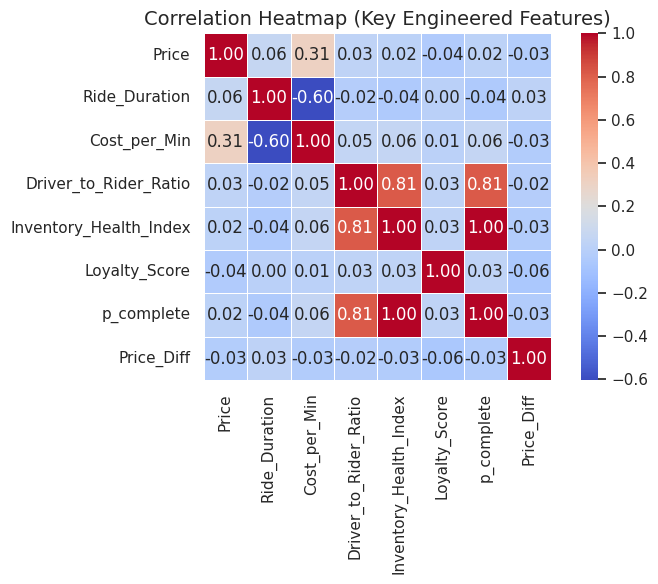

In [145]:
# ============================
# Cell 6 - Correlation Heatmap (Clean & Clear)
# ============================

important_features = [
    "Price", "Ride_Duration", "Cost_per_Min",
    "Driver_to_Rider_Ratio", "Inventory_Health_Index",
    "Loyalty_Score", "p_complete", "Price_Diff"
]

plt.figure(figsize=(8, 6))
corr = df[important_features].corr()

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True,
    linewidths=0.5
)
plt.title("Correlation Heatmap (Key Engineered Features)", fontsize=14)
plt.tight_layout()
plt.show()
